In [4]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time
from tensorflow.keras import Model
import tensorflow as tf
import tensorflow_addons as tfa
import matplotlib

from IPython import display

In [5]:
d1 = '/home/data_backup/data_bu/eva_dataset/materialForEEVA/images/session2/client'
d2 = '/home/data_backup/data_bu/eva_dataset/materialForEEVA/images/session2/counselor'
# iterate over files in
# that directory

data_in = []
data_out = []
for filename in sorted(os.listdir(d1)):
    fn = os.path.join(d1, filename)
    if os.path.isfile(fn):
        with open(fn) as f:
            lines = f.readlines()
            aline = []
            for x in lines:
                aline.append([int(y) for y in x.rstrip('\n').split(" ")[-2:]])
            data_in.append(aline)
        f.close()


for filename in sorted(os.listdir(d2)):
    fn = os.path.join(d2, filename)
    # checking if it is a file
    if os.path.isfile(fn):
        with open(fn) as f:
            lines = f.readlines()
            aline = []
            for x in lines:
                aline.append([int(y) for y in x.rstrip('\n').split(" ")[-2:]])
            data_out.append(aline)
        f.close()
        

In [13]:
data_in = data_in[:len(data_out)]
# print(tf.constant(data_in).shape)
# print(tf.constant(data_out).shape)

data = []
sequence_len = 16
ds = tf.data.Dataset.from_tensor_slices((tf.constant(data_in), tf.constant(data_out)))
ds = ds.batch(sequence_len)
ds = ds.shuffle(ds.cardinality().numpy())
for inn, outt in ds:
    print(inn.shape, outt.shape)

(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16,

(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16, 68, 2)
(16, 68, 2) (16,

In [6]:
class U_Net(Model):

    def __init__(self, in_dim, num_channels=2, emb_dim=512, gate_filters=32, num_resolutions=2, attn_res_idx=2):
        super().__init__()
        
        self.in_dim = in_dim
        self.num_channels = num_channels
        self.num_resolutions = num_resolutions
        self.attn_res_idx = attn_res_idx
        self.emb_dim = emb_dim
        self.gate_filters = gate_filters
        self.model = self.build_graph()
        
#     def timestep_embedding(self, ts, embedding_dim):
#         assert len(ts.shape)==1
        
#         half_dim = embedding_dim // 2
#         emb = -(tf.math.log(10000.0)/(half_dim-1))
        
#         idxs = tf.range(half_dim, dtype=tf.float32)
#         emb = tf.math.exp(idxs*emb)
        
#         ts = tf.cast(ts, dtype=tf.float32)
        
#         emb = ts[:,None]* emb[None,:]
        
#         pe = tf.concat([tf.sin(emb), tf.cos(emb)], axis=1)
        
#         return pe
    
    def nonlinearity(self, x):
        return tf.keras.activations.swish(x)
    
    def normalize(self, x):
        return tfa.layers.InstanceNormalization(axis=-1)(x)
        
    def ResBlK(self, x, temb=None):
        h = self.nonlinearity(self.normalize(x))
        h = layers.Conv2D(x.shape[-1], (1, 1),
                                        strides=(1, 1), padding='same')(h)
        if not temb == None:
            temb = self.nonlinearity(temb)
            h +=  tf.reshape(layers.Dense(h.shape[-1])(temb), (-1, 1, 1,h.shape[-1]))

        h = self.nonlinearity(self.normalize(h))
        h = layers.Conv2D(x.shape[-1], (1, 1),
                                        strides=(1, 1), padding='same')(h)
        
        return x+h
        
    def downsample(self, x, filters, factor=2):
        return layers.Conv2D(filters, (3, 3),
                                        strides=(factor, factor), padding='same')(x)

    def upsample(self, x, filters, factor=2):
        return layers.Conv2DTranspose(filters, (3, 3),
                                       strides=(factor, factor), padding='same')(x)
        
    def NonlocalGaussian(self, x):
        h = self.normalize(x)
        theta = layers.Conv2D(x.shape[-1]/2.0, (1, 1),
                                        strides=(1, 1), padding='same')(h)
        phi = layers.Conv2D(x.shape[-1]/2.0, (1, 1),
                                        strides=(1, 1), padding='same')(h)
        g = layers.Conv2D(x.shape[-1]/2.0, (1, 1),
                                        strides=(1, 1), padding='same')(h)
        phi = tf.transpose(phi, (0, 3, 2, 1))

        theta = tf.reshape(theta, shape=(-1, theta.shape[1]*theta.shape[2], theta.shape[3]))

        phi = tf.reshape(phi, shape=(-1, phi.shape[1], phi.shape[2]*phi.shape[3]))
        g = tf.reshape(g, shape=(-1, g.shape[1]*g.shape[2], g.shape[3]))
        
        f = tf.matmul(theta, phi)
        
        f = layers.Softmax()(f)
        
        y = tf.matmul(f, g)
        
        y = tf.reshape(y, (-1, x.shape[1], x.shape[2], y.shape[-1]))
        
        z = tf.math.add(x, layers.Conv2D(x.shape[-1], (1, 1),
                                        strides=(1, 1), padding='same')(y))
        return z
    
    def design(self, img_input):
        
        
        hs = [layers.Conv2D(self.gate_filters, (1, 1),
                                        strides=(1, 1), padding='same')(img_input)]
        for i in range(self.num_resolutions):
            h = self.ResBlK(hs[-1])
            if i == self.attn_res_idx:
                h = self.NonlocalGaussian(h)
                
            if i != self.num_resolutions - 1:
                h = self.downsample(h, h.shape[-1]*2)
                
            hs.append(h)

        h = hs[-1]
        h = self.ResBlK(h)
        h = self.NonlocalGaussian(h)
        h = self.ResBlK(h)
                
        for i in reversed(range(self.num_resolutions)):
            h = h+hs[i]
            h = self.ResBlK(h)

            if i == self.attn_res_idx:
                h = self.NonlocalGaussian(h)
                
            if i != 0:
                h = self.upsample(h, h.shape[-1]//2)
        
                
        h = self.nonlinearity(self.normalize(h))
        
        h = layers.Conv2D(self.num_channels, (1, 1),
                                        strides=(1, 1), padding='same')(h)
        
        
        return h
    
    def call(self, x):
        return self.model([x])
    
    def build_graph(self):
        x = layers.Input(shape=(self.in_dim[0],
                                        self.in_dim[1], self.num_channels))
        
        return Model(inputs=[x], outputs=self.design(x))
        

In [7]:
unet1=U_Net((16, 68))

2022-12-02 14:51:24.573723: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-02 14:51:24.596106: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-02 14:51:24.596587: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-02 14:51:24.598367: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

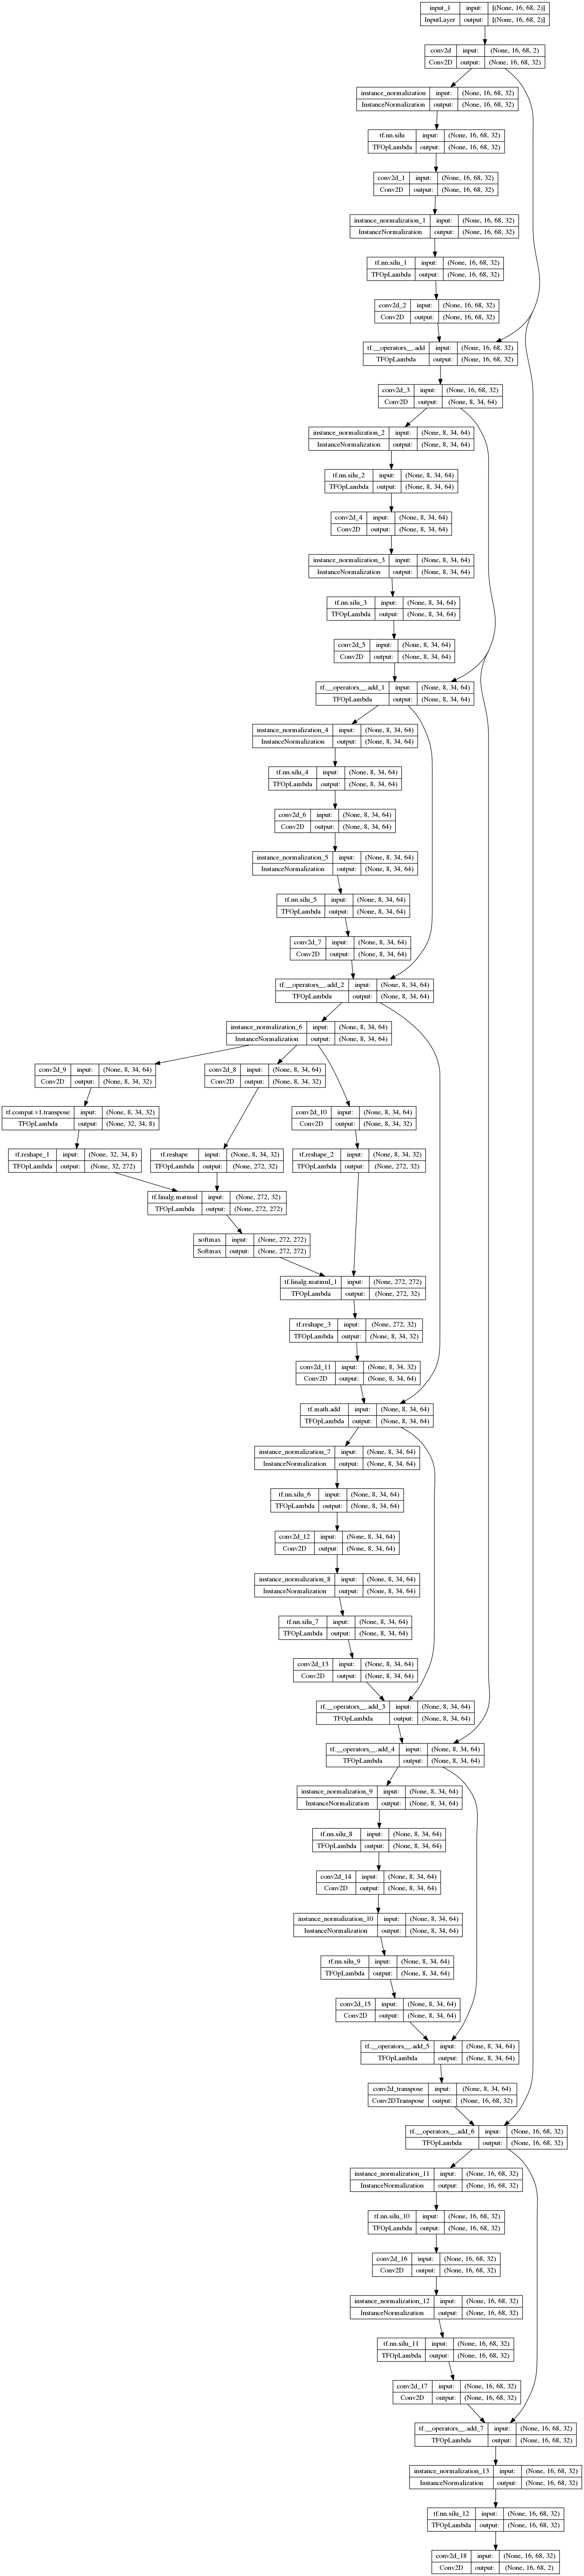

In [8]:
tf.keras.utils.plot_model(unet1.model, show_shapes=True)

In [23]:
EPSILON = 1e-16

class model:
    def __init__(self, dataset_path, data_shape, num_channels, dum=5, train_split=0.8,
                 batch_size=64, lr=3e-4):
        self.s = data_shape
        self.nc = num_channels
        self.bs = batch_size
        self.dum = dum
        
        if not dataset_path==None:
            cl_path = dataset_path + "/client"
            co_path = dataset_path + "/counselor"

            self.ds = self.make_dataset(cl_path, co_path)
            
            ds_size = self.ds.cardinality().numpy()
            train_size = int(train_split * ds_size)
            test_size = int((1.0-train_split) * ds_size)

            self.train_ds = self.ds.take(train_size)    
            self.test_ds = self.ds.skip(train_size)
        else:
            print("WARNING: Dataset not loaded, Model in Generator mode")
        
        self.g = U_Net(self.s, self.nc)
        self.g_opt = tf.keras.optimizers.Adam(lr)

    def make_dataset(self, d1, d2):
        data_in = []
        data_out = []
        for filename in sorted(os.listdir(d1)):
            fn = os.path.join(d1, filename)
            if os.path.isfile(fn):
                with open(fn) as f:
                    lines = f.readlines()
                    aline = []
                    for x in lines:
                        aline.append([int(y) for y in x.rstrip('\n').split(" ")[-2:]])
                    data_in.append(aline)
                f.close()


        for filename in sorted(os.listdir(d2)):
            fn = os.path.join(d2, filename)
            # checking if it is a file
            if os.path.isfile(fn):
                with open(fn) as f:
                    lines = f.readlines()
                    aline = []
                    for x in lines:
                        aline.append([int(y) for y in x.rstrip('\n').split(" ")[-2:]])
                    data_out.append(aline)
                f.close()

        data_in = data_in[:len(data_out)]
        data = []
        sequence_len = self.s[0]
        ds = tf.data.Dataset.from_tensor_slices((tf.constant(data_in), tf.constant(data_out)))
        ds = ds.batch(sequence_len)
        ds = ds.shuffle(ds.cardinality().numpy())
        
        return ds
    
    def loss_func(self, pred_co, gt_co):
        return tf.reduce_mean(tf.math.sqrt(tf.reduce_sum(tf.math.add(pred_co, -tf.cast(gt_co, tf.float32))**2, axis = [1,2,3])+EPSILON))
        
    @tf.function
    def update(self, cl, co):
        with tf.GradientTape() as g_tape:
            pred_co = self.g(cl)
            g_loss = self.loss_func(pred_co, co)
            
        grad_g = g_tape.gradient(g_loss, self.g.trainable_variables)
        self.g_opt.apply_gradients(zip(grad_g, self.g.trainable_variables))
        
        return g_loss
        
    def train(self, epochs=50):
        for epo in range(epochs):
            g_losses = []
            
            batch_inn = []
            batch_outt = []

            for inn, outt in self.train_ds:
                if inn.shape == (8,68,2) and outt.shape == (8,68,2):
                    if (len(batch_inn))%self.bs ==0 and not len(batch_inn) == 0:
                        tf_batch_inn = tf.stack(batch_inn)
                        tf_batch_outt = tf.stack(batch_outt)
                        g_losses.append(self.update(tf_batch_inn, tf_batch_outt))
                        batch_inn = []
                        batch_outt = []
                    else:
                        batch_inn.append(inn)
                        batch_outt.append(outt)


            print("Epoch {:04d}".format(epo), "Generator Avg. Loss: ", np.mean(g_losses), flush=True)
    def test(self):
        errors = []
        batch_inn = []
        batch_outt = []
        for inn, outt in self.test_ds:
            if inn.shape == (8,68,2) and outt.shape == (8,68,2):
                if (len(batch_inn))%self.bs ==0 and not len(batch_inn) == 0:
                    tf_batch_inn = tf.stack(batch_inn)
                    tf_batch_outt = tf.stack(batch_outt)
                    pred_co = self.g(tf_batch_inn)
                    errors.append(self.loss_func(pred_co, tf_batch_outt))
                    batch_inn = []
                    batch_outt = []
                else:
                    batch_inn.append(inn)
                    batch_outt.append(outt)
        print("Test Set Avg. Loss: ", np.mean(errors), flush=True)
        

In [24]:
ds_path = "/home/data_backup/data_bu/eva_dataset/materialForEEVA/images/session2"

In [25]:
m1 = model(ds_path, (8,68), 2)

In [28]:
m1.train(10000)

Epoch 0000 Generator Avg. Loss:  7905.6514
Epoch 0001 Generator Avg. Loss:  7870.153
Epoch 0002 Generator Avg. Loss:  7827.176
Epoch 0003 Generator Avg. Loss:  7784.709
Epoch 0004 Generator Avg. Loss:  7740.497
Epoch 0005 Generator Avg. Loss:  7703.55
Epoch 0006 Generator Avg. Loss:  7650.367
Epoch 0007 Generator Avg. Loss:  7593.6807
Epoch 0008 Generator Avg. Loss:  7555.8975
Epoch 0009 Generator Avg. Loss:  7495.9453
Epoch 0010 Generator Avg. Loss:  7441.956
Epoch 0011 Generator Avg. Loss:  7385.625
Epoch 0012 Generator Avg. Loss:  7336.193
Epoch 0013 Generator Avg. Loss:  7278.882
Epoch 0014 Generator Avg. Loss:  7223.3
Epoch 0015 Generator Avg. Loss:  7154.586
Epoch 0016 Generator Avg. Loss:  7103.522
Epoch 0017 Generator Avg. Loss:  7037.656
Epoch 0018 Generator Avg. Loss:  6973.069
Epoch 0019 Generator Avg. Loss:  6912.3604
Epoch 0020 Generator Avg. Loss:  6842.9185
Epoch 0021 Generator Avg. Loss:  6786.459
Epoch 0022 Generator Avg. Loss:  6706.3013
Epoch 0023 Generator Avg. Loss

Epoch 0193 Generator Avg. Loss:  525.7389
Epoch 0194 Generator Avg. Loss:  519.91907
Epoch 0195 Generator Avg. Loss:  526.794
Epoch 0196 Generator Avg. Loss:  524.52997
Epoch 0197 Generator Avg. Loss:  520.6286
Epoch 0198 Generator Avg. Loss:  523.1015
Epoch 0199 Generator Avg. Loss:  518.4002
Epoch 0200 Generator Avg. Loss:  519.3604
Epoch 0201 Generator Avg. Loss:  515.3703
Epoch 0202 Generator Avg. Loss:  513.94525
Epoch 0203 Generator Avg. Loss:  517.06036
Epoch 0204 Generator Avg. Loss:  509.32486
Epoch 0205 Generator Avg. Loss:  509.5705
Epoch 0206 Generator Avg. Loss:  510.85886
Epoch 0207 Generator Avg. Loss:  507.49963
Epoch 0208 Generator Avg. Loss:  509.06232
Epoch 0209 Generator Avg. Loss:  506.2394
Epoch 0210 Generator Avg. Loss:  510.32007
Epoch 0211 Generator Avg. Loss:  510.95963
Epoch 0212 Generator Avg. Loss:  510.10547
Epoch 0213 Generator Avg. Loss:  504.9578
Epoch 0214 Generator Avg. Loss:  504.68176
Epoch 0215 Generator Avg. Loss:  508.04285
Epoch 0216 Generator A

Epoch 0386 Generator Avg. Loss:  464.19598
Epoch 0387 Generator Avg. Loss:  472.08722
Epoch 0388 Generator Avg. Loss:  463.57144
Epoch 0389 Generator Avg. Loss:  468.12344
Epoch 0390 Generator Avg. Loss:  469.65753
Epoch 0391 Generator Avg. Loss:  467.08545
Epoch 0392 Generator Avg. Loss:  469.95642
Epoch 0393 Generator Avg. Loss:  468.15237
Epoch 0394 Generator Avg. Loss:  462.94656
Epoch 0395 Generator Avg. Loss:  461.2014
Epoch 0396 Generator Avg. Loss:  464.80084
Epoch 0397 Generator Avg. Loss:  463.78836
Epoch 0398 Generator Avg. Loss:  466.10034
Epoch 0399 Generator Avg. Loss:  466.97272
Epoch 0400 Generator Avg. Loss:  467.44788
Epoch 0401 Generator Avg. Loss:  466.7686
Epoch 0402 Generator Avg. Loss:  460.9399
Epoch 0403 Generator Avg. Loss:  467.17984
Epoch 0404 Generator Avg. Loss:  465.91714
Epoch 0405 Generator Avg. Loss:  467.566
Epoch 0406 Generator Avg. Loss:  469.8508
Epoch 0407 Generator Avg. Loss:  461.88898
Epoch 0408 Generator Avg. Loss:  460.58273
Epoch 0409 Genera

Epoch 0578 Generator Avg. Loss:  454.48828
Epoch 0579 Generator Avg. Loss:  450.917
Epoch 0580 Generator Avg. Loss:  453.8361
Epoch 0581 Generator Avg. Loss:  452.41336
Epoch 0582 Generator Avg. Loss:  450.70462
Epoch 0583 Generator Avg. Loss:  455.28702
Epoch 0584 Generator Avg. Loss:  453.0212
Epoch 0585 Generator Avg. Loss:  453.57858
Epoch 0586 Generator Avg. Loss:  451.1243
Epoch 0587 Generator Avg. Loss:  454.95346
Epoch 0588 Generator Avg. Loss:  452.3058
Epoch 0589 Generator Avg. Loss:  446.6073
Epoch 0590 Generator Avg. Loss:  451.77466
Epoch 0591 Generator Avg. Loss:  453.60117
Epoch 0592 Generator Avg. Loss:  451.22012
Epoch 0593 Generator Avg. Loss:  454.19296
Epoch 0594 Generator Avg. Loss:  447.78064
Epoch 0595 Generator Avg. Loss:  448.92126
Epoch 0596 Generator Avg. Loss:  450.00537
Epoch 0597 Generator Avg. Loss:  450.87555
Epoch 0598 Generator Avg. Loss:  450.85156
Epoch 0599 Generator Avg. Loss:  449.74142
Epoch 0600 Generator Avg. Loss:  449.35236
Epoch 0601 Generat

Epoch 0770 Generator Avg. Loss:  436.95282
Epoch 0771 Generator Avg. Loss:  441.66782
Epoch 0772 Generator Avg. Loss:  440.9773
Epoch 0773 Generator Avg. Loss:  439.07825
Epoch 0774 Generator Avg. Loss:  435.71405
Epoch 0775 Generator Avg. Loss:  437.25775
Epoch 0776 Generator Avg. Loss:  439.47214
Epoch 0777 Generator Avg. Loss:  444.22458
Epoch 0778 Generator Avg. Loss:  438.27747
Epoch 0779 Generator Avg. Loss:  440.41336
Epoch 0780 Generator Avg. Loss:  441.34067
Epoch 0781 Generator Avg. Loss:  436.61743
Epoch 0782 Generator Avg. Loss:  436.89963
Epoch 0783 Generator Avg. Loss:  432.65186
Epoch 0784 Generator Avg. Loss:  432.6372
Epoch 0785 Generator Avg. Loss:  439.16562
Epoch 0786 Generator Avg. Loss:  438.59113
Epoch 0787 Generator Avg. Loss:  438.6474
Epoch 0788 Generator Avg. Loss:  437.97177
Epoch 0789 Generator Avg. Loss:  437.5255
Epoch 0790 Generator Avg. Loss:  432.6415
Epoch 0791 Generator Avg. Loss:  444.31104
Epoch 0792 Generator Avg. Loss:  433.27963
Epoch 0793 Gener

Epoch 0962 Generator Avg. Loss:  416.65903
Epoch 0963 Generator Avg. Loss:  417.78897
Epoch 0964 Generator Avg. Loss:  413.88223
Epoch 0965 Generator Avg. Loss:  417.9594
Epoch 0966 Generator Avg. Loss:  422.06125
Epoch 0967 Generator Avg. Loss:  419.0556
Epoch 0968 Generator Avg. Loss:  418.679
Epoch 0969 Generator Avg. Loss:  418.73123
Epoch 0970 Generator Avg. Loss:  413.3524
Epoch 0971 Generator Avg. Loss:  425.3299
Epoch 0972 Generator Avg. Loss:  421.88632
Epoch 0973 Generator Avg. Loss:  411.3783
Epoch 0974 Generator Avg. Loss:  415.50406
Epoch 0975 Generator Avg. Loss:  419.61084
Epoch 0976 Generator Avg. Loss:  415.5884
Epoch 0977 Generator Avg. Loss:  415.00244
Epoch 0978 Generator Avg. Loss:  420.46893
Epoch 0979 Generator Avg. Loss:  411.27283
Epoch 0980 Generator Avg. Loss:  423.7624
Epoch 0981 Generator Avg. Loss:  416.48395
Epoch 0982 Generator Avg. Loss:  418.1384
Epoch 0983 Generator Avg. Loss:  415.70004
Epoch 0984 Generator Avg. Loss:  420.81677
Epoch 0985 Generator 

Epoch 1155 Generator Avg. Loss:  400.2612
Epoch 1156 Generator Avg. Loss:  392.96045
Epoch 1157 Generator Avg. Loss:  400.28516
Epoch 1158 Generator Avg. Loss:  391.7422
Epoch 1159 Generator Avg. Loss:  396.7118
Epoch 1160 Generator Avg. Loss:  400.6118
Epoch 1161 Generator Avg. Loss:  395.4572
Epoch 1162 Generator Avg. Loss:  391.57996
Epoch 1163 Generator Avg. Loss:  392.84656
Epoch 1164 Generator Avg. Loss:  393.68542
Epoch 1165 Generator Avg. Loss:  398.6628
Epoch 1166 Generator Avg. Loss:  402.38217
Epoch 1167 Generator Avg. Loss:  397.0295
Epoch 1168 Generator Avg. Loss:  399.23727
Epoch 1169 Generator Avg. Loss:  389.9936
Epoch 1170 Generator Avg. Loss:  399.24756
Epoch 1171 Generator Avg. Loss:  396.52075
Epoch 1172 Generator Avg. Loss:  397.1085
Epoch 1173 Generator Avg. Loss:  395.1612
Epoch 1174 Generator Avg. Loss:  398.16766
Epoch 1175 Generator Avg. Loss:  400.12567
Epoch 1176 Generator Avg. Loss:  395.6942
Epoch 1177 Generator Avg. Loss:  395.0257
Epoch 1178 Generator Av

Epoch 1348 Generator Avg. Loss:  371.0454
Epoch 1349 Generator Avg. Loss:  377.10538
Epoch 1350 Generator Avg. Loss:  380.15192
Epoch 1351 Generator Avg. Loss:  379.72766
Epoch 1352 Generator Avg. Loss:  376.47803
Epoch 1353 Generator Avg. Loss:  376.3893
Epoch 1354 Generator Avg. Loss:  380.285
Epoch 1355 Generator Avg. Loss:  374.7615
Epoch 1356 Generator Avg. Loss:  379.0983
Epoch 1357 Generator Avg. Loss:  373.5099
Epoch 1358 Generator Avg. Loss:  372.73288
Epoch 1359 Generator Avg. Loss:  382.73508
Epoch 1360 Generator Avg. Loss:  373.01303
Epoch 1361 Generator Avg. Loss:  375.41748
Epoch 1362 Generator Avg. Loss:  376.5218
Epoch 1363 Generator Avg. Loss:  372.80206
Epoch 1364 Generator Avg. Loss:  376.7734
Epoch 1365 Generator Avg. Loss:  385.5756
Epoch 1366 Generator Avg. Loss:  375.5337
Epoch 1367 Generator Avg. Loss:  377.55466
Epoch 1368 Generator Avg. Loss:  376.28854
Epoch 1369 Generator Avg. Loss:  372.3238
Epoch 1370 Generator Avg. Loss:  368.99225
Epoch 1371 Generator Av

Epoch 1541 Generator Avg. Loss:  353.4418
Epoch 1542 Generator Avg. Loss:  353.89975
Epoch 1543 Generator Avg. Loss:  355.9175
Epoch 1544 Generator Avg. Loss:  354.5038
Epoch 1545 Generator Avg. Loss:  355.05823
Epoch 1546 Generator Avg. Loss:  357.08337
Epoch 1547 Generator Avg. Loss:  353.1852
Epoch 1548 Generator Avg. Loss:  353.1726
Epoch 1549 Generator Avg. Loss:  349.10846
Epoch 1550 Generator Avg. Loss:  353.69595
Epoch 1551 Generator Avg. Loss:  356.56854
Epoch 1552 Generator Avg. Loss:  356.2274
Epoch 1553 Generator Avg. Loss:  353.64642
Epoch 1554 Generator Avg. Loss:  352.40375
Epoch 1555 Generator Avg. Loss:  354.1494
Epoch 1556 Generator Avg. Loss:  359.9352
Epoch 1557 Generator Avg. Loss:  354.50485
Epoch 1558 Generator Avg. Loss:  348.56918
Epoch 1559 Generator Avg. Loss:  352.8549
Epoch 1560 Generator Avg. Loss:  354.1319
Epoch 1561 Generator Avg. Loss:  351.2729
Epoch 1562 Generator Avg. Loss:  353.3002
Epoch 1563 Generator Avg. Loss:  350.7271
Epoch 1564 Generator Avg

Epoch 1734 Generator Avg. Loss:  340.84186
Epoch 1735 Generator Avg. Loss:  336.3688
Epoch 1736 Generator Avg. Loss:  337.5526
Epoch 1737 Generator Avg. Loss:  331.4381
Epoch 1738 Generator Avg. Loss:  333.74918
Epoch 1739 Generator Avg. Loss:  329.635
Epoch 1740 Generator Avg. Loss:  338.10132
Epoch 1741 Generator Avg. Loss:  335.56052
Epoch 1742 Generator Avg. Loss:  338.70187
Epoch 1743 Generator Avg. Loss:  331.53757
Epoch 1744 Generator Avg. Loss:  337.54788
Epoch 1745 Generator Avg. Loss:  336.49664
Epoch 1746 Generator Avg. Loss:  330.07666
Epoch 1747 Generator Avg. Loss:  335.738
Epoch 1748 Generator Avg. Loss:  335.9372
Epoch 1749 Generator Avg. Loss:  336.51328
Epoch 1750 Generator Avg. Loss:  338.09378
Epoch 1751 Generator Avg. Loss:  334.89783
Epoch 1752 Generator Avg. Loss:  335.38947
Epoch 1753 Generator Avg. Loss:  335.5708
Epoch 1754 Generator Avg. Loss:  332.84424
Epoch 1755 Generator Avg. Loss:  336.75803
Epoch 1756 Generator Avg. Loss:  331.01837
Epoch 1757 Generator

Epoch 1927 Generator Avg. Loss:  315.59305
Epoch 1928 Generator Avg. Loss:  313.64536
Epoch 1929 Generator Avg. Loss:  320.9615
Epoch 1930 Generator Avg. Loss:  314.722
Epoch 1931 Generator Avg. Loss:  317.0415
Epoch 1932 Generator Avg. Loss:  317.55927
Epoch 1933 Generator Avg. Loss:  319.80893
Epoch 1934 Generator Avg. Loss:  316.28006
Epoch 1935 Generator Avg. Loss:  313.10757
Epoch 1936 Generator Avg. Loss:  314.3728
Epoch 1937 Generator Avg. Loss:  313.83527
Epoch 1938 Generator Avg. Loss:  317.20828
Epoch 1939 Generator Avg. Loss:  318.3316
Epoch 1940 Generator Avg. Loss:  311.67065
Epoch 1941 Generator Avg. Loss:  313.41776
Epoch 1942 Generator Avg. Loss:  306.97745
Epoch 1943 Generator Avg. Loss:  313.39587
Epoch 1944 Generator Avg. Loss:  315.85486
Epoch 1945 Generator Avg. Loss:  315.02185
Epoch 1946 Generator Avg. Loss:  314.9256
Epoch 1947 Generator Avg. Loss:  317.6806
Epoch 1948 Generator Avg. Loss:  315.71518
Epoch 1949 Generator Avg. Loss:  315.26395
Epoch 1950 Generato

Epoch 2120 Generator Avg. Loss:  312.84705
Epoch 2121 Generator Avg. Loss:  304.54956
Epoch 2122 Generator Avg. Loss:  302.1486
Epoch 2123 Generator Avg. Loss:  298.89575
Epoch 2124 Generator Avg. Loss:  300.1382
Epoch 2125 Generator Avg. Loss:  303.7704
Epoch 2126 Generator Avg. Loss:  298.4287
Epoch 2127 Generator Avg. Loss:  302.30304
Epoch 2128 Generator Avg. Loss:  302.63364
Epoch 2129 Generator Avg. Loss:  297.4258
Epoch 2130 Generator Avg. Loss:  298.688
Epoch 2131 Generator Avg. Loss:  301.00027
Epoch 2132 Generator Avg. Loss:  296.17383
Epoch 2133 Generator Avg. Loss:  296.3354
Epoch 2134 Generator Avg. Loss:  302.18347
Epoch 2135 Generator Avg. Loss:  302.35254
Epoch 2136 Generator Avg. Loss:  301.83722
Epoch 2137 Generator Avg. Loss:  302.38336
Epoch 2138 Generator Avg. Loss:  302.16345
Epoch 2139 Generator Avg. Loss:  304.7359
Epoch 2140 Generator Avg. Loss:  302.69788
Epoch 2141 Generator Avg. Loss:  297.67413
Epoch 2142 Generator Avg. Loss:  300.79782
Epoch 2143 Generator

Epoch 2313 Generator Avg. Loss:  283.44995
Epoch 2314 Generator Avg. Loss:  284.55072
Epoch 2315 Generator Avg. Loss:  286.36847
Epoch 2316 Generator Avg. Loss:  285.30432
Epoch 2317 Generator Avg. Loss:  285.25034
Epoch 2318 Generator Avg. Loss:  284.98233
Epoch 2319 Generator Avg. Loss:  284.5199
Epoch 2320 Generator Avg. Loss:  289.25064
Epoch 2321 Generator Avg. Loss:  287.59854
Epoch 2322 Generator Avg. Loss:  284.41183
Epoch 2323 Generator Avg. Loss:  288.081
Epoch 2324 Generator Avg. Loss:  287.86786
Epoch 2325 Generator Avg. Loss:  289.32056
Epoch 2326 Generator Avg. Loss:  290.97644
Epoch 2327 Generator Avg. Loss:  287.50626
Epoch 2328 Generator Avg. Loss:  284.90506
Epoch 2329 Generator Avg. Loss:  286.46954
Epoch 2330 Generator Avg. Loss:  281.64032
Epoch 2331 Generator Avg. Loss:  286.33673
Epoch 2332 Generator Avg. Loss:  283.20285
Epoch 2333 Generator Avg. Loss:  289.5222
Epoch 2334 Generator Avg. Loss:  284.1557
Epoch 2335 Generator Avg. Loss:  287.63647
Epoch 2336 Gener

Epoch 2505 Generator Avg. Loss:  270.64536
Epoch 2506 Generator Avg. Loss:  272.4355
Epoch 2507 Generator Avg. Loss:  276.224
Epoch 2508 Generator Avg. Loss:  276.764
Epoch 2509 Generator Avg. Loss:  272.31342
Epoch 2510 Generator Avg. Loss:  272.8035
Epoch 2511 Generator Avg. Loss:  274.62558
Epoch 2512 Generator Avg. Loss:  273.90698
Epoch 2513 Generator Avg. Loss:  274.81177
Epoch 2514 Generator Avg. Loss:  273.01944
Epoch 2515 Generator Avg. Loss:  273.61014
Epoch 2516 Generator Avg. Loss:  270.10364
Epoch 2517 Generator Avg. Loss:  274.51685
Epoch 2518 Generator Avg. Loss:  275.50937
Epoch 2519 Generator Avg. Loss:  275.51144
Epoch 2520 Generator Avg. Loss:  270.02725
Epoch 2521 Generator Avg. Loss:  265.60016
Epoch 2522 Generator Avg. Loss:  277.46317
Epoch 2523 Generator Avg. Loss:  276.3312
Epoch 2524 Generator Avg. Loss:  272.7073
Epoch 2525 Generator Avg. Loss:  274.76126
Epoch 2526 Generator Avg. Loss:  272.53616
Epoch 2527 Generator Avg. Loss:  269.23773
Epoch 2528 Generato

Epoch 2698 Generator Avg. Loss:  262.48697
Epoch 2699 Generator Avg. Loss:  262.05167
Epoch 2700 Generator Avg. Loss:  262.65533
Epoch 2701 Generator Avg. Loss:  260.98816
Epoch 2702 Generator Avg. Loss:  264.22156
Epoch 2703 Generator Avg. Loss:  259.01346
Epoch 2704 Generator Avg. Loss:  260.28677
Epoch 2705 Generator Avg. Loss:  261.99072
Epoch 2706 Generator Avg. Loss:  257.5935
Epoch 2707 Generator Avg. Loss:  261.2859
Epoch 2708 Generator Avg. Loss:  264.3017
Epoch 2709 Generator Avg. Loss:  258.81677
Epoch 2710 Generator Avg. Loss:  260.62155
Epoch 2711 Generator Avg. Loss:  262.3624
Epoch 2712 Generator Avg. Loss:  264.81058
Epoch 2713 Generator Avg. Loss:  260.19354
Epoch 2714 Generator Avg. Loss:  259.36093
Epoch 2715 Generator Avg. Loss:  263.60413
Epoch 2716 Generator Avg. Loss:  261.43967
Epoch 2717 Generator Avg. Loss:  257.82422
Epoch 2718 Generator Avg. Loss:  259.90024
Epoch 2719 Generator Avg. Loss:  262.437
Epoch 2720 Generator Avg. Loss:  261.6148
Epoch 2721 Generat

Epoch 2890 Generator Avg. Loss:  250.1685
Epoch 2891 Generator Avg. Loss:  246.36694
Epoch 2892 Generator Avg. Loss:  253.6406
Epoch 2893 Generator Avg. Loss:  257.33804
Epoch 2894 Generator Avg. Loss:  253.88284
Epoch 2895 Generator Avg. Loss:  252.96982
Epoch 2896 Generator Avg. Loss:  254.27728
Epoch 2897 Generator Avg. Loss:  255.09721
Epoch 2898 Generator Avg. Loss:  251.09769
Epoch 2899 Generator Avg. Loss:  249.32872
Epoch 2900 Generator Avg. Loss:  256.7649
Epoch 2901 Generator Avg. Loss:  248.18947
Epoch 2902 Generator Avg. Loss:  252.19507
Epoch 2903 Generator Avg. Loss:  250.07318
Epoch 2904 Generator Avg. Loss:  251.12671
Epoch 2905 Generator Avg. Loss:  253.57693
Epoch 2906 Generator Avg. Loss:  252.65314
Epoch 2907 Generator Avg. Loss:  253.91841
Epoch 2908 Generator Avg. Loss:  250.63148
Epoch 2909 Generator Avg. Loss:  250.07321
Epoch 2910 Generator Avg. Loss:  252.53966
Epoch 2911 Generator Avg. Loss:  252.57787
Epoch 2912 Generator Avg. Loss:  252.57253
Epoch 2913 Gen

Epoch 3082 Generator Avg. Loss:  243.86342
Epoch 3083 Generator Avg. Loss:  247.20512
Epoch 3084 Generator Avg. Loss:  240.6523
Epoch 3085 Generator Avg. Loss:  243.59724
Epoch 3086 Generator Avg. Loss:  249.69579
Epoch 3087 Generator Avg. Loss:  241.59894
Epoch 3088 Generator Avg. Loss:  238.37137
Epoch 3089 Generator Avg. Loss:  234.39925
Epoch 3090 Generator Avg. Loss:  244.75854
Epoch 3091 Generator Avg. Loss:  243.24767
Epoch 3092 Generator Avg. Loss:  241.8569
Epoch 3093 Generator Avg. Loss:  245.84384
Epoch 3094 Generator Avg. Loss:  244.74796
Epoch 3095 Generator Avg. Loss:  243.90631
Epoch 3096 Generator Avg. Loss:  242.43224
Epoch 3097 Generator Avg. Loss:  239.56757
Epoch 3098 Generator Avg. Loss:  239.98431
Epoch 3099 Generator Avg. Loss:  240.25395
Epoch 3100 Generator Avg. Loss:  243.68906
Epoch 3101 Generator Avg. Loss:  241.35304
Epoch 3102 Generator Avg. Loss:  238.15364
Epoch 3103 Generator Avg. Loss:  239.99002
Epoch 3104 Generator Avg. Loss:  240.16397
Epoch 3105 Ge

Epoch 3274 Generator Avg. Loss:  227.1623
Epoch 3275 Generator Avg. Loss:  230.47313
Epoch 3276 Generator Avg. Loss:  229.44733
Epoch 3277 Generator Avg. Loss:  235.4043
Epoch 3278 Generator Avg. Loss:  232.06348
Epoch 3279 Generator Avg. Loss:  237.07484
Epoch 3280 Generator Avg. Loss:  232.60405
Epoch 3281 Generator Avg. Loss:  245.1097
Epoch 3282 Generator Avg. Loss:  236.84805
Epoch 3283 Generator Avg. Loss:  231.72426
Epoch 3284 Generator Avg. Loss:  230.30144
Epoch 3285 Generator Avg. Loss:  234.89873
Epoch 3286 Generator Avg. Loss:  233.88551
Epoch 3287 Generator Avg. Loss:  237.8469
Epoch 3288 Generator Avg. Loss:  237.43372
Epoch 3289 Generator Avg. Loss:  235.77444
Epoch 3290 Generator Avg. Loss:  232.8397
Epoch 3291 Generator Avg. Loss:  234.54102
Epoch 3292 Generator Avg. Loss:  230.0587
Epoch 3293 Generator Avg. Loss:  230.5733
Epoch 3294 Generator Avg. Loss:  231.08018
Epoch 3295 Generator Avg. Loss:  230.79305
Epoch 3296 Generator Avg. Loss:  229.83087
Epoch 3297 Generat

Epoch 3466 Generator Avg. Loss:  225.4508
Epoch 3467 Generator Avg. Loss:  225.1136
Epoch 3468 Generator Avg. Loss:  230.2392
Epoch 3469 Generator Avg. Loss:  228.01169
Epoch 3470 Generator Avg. Loss:  225.42685
Epoch 3471 Generator Avg. Loss:  227.86754
Epoch 3472 Generator Avg. Loss:  225.32881
Epoch 3473 Generator Avg. Loss:  228.44946
Epoch 3474 Generator Avg. Loss:  228.80978
Epoch 3475 Generator Avg. Loss:  228.21655
Epoch 3476 Generator Avg. Loss:  229.61537
Epoch 3477 Generator Avg. Loss:  225.5115
Epoch 3478 Generator Avg. Loss:  225.06297
Epoch 3479 Generator Avg. Loss:  225.98729
Epoch 3480 Generator Avg. Loss:  222.1075
Epoch 3481 Generator Avg. Loss:  225.90254
Epoch 3482 Generator Avg. Loss:  222.9807
Epoch 3483 Generator Avg. Loss:  225.61768
Epoch 3484 Generator Avg. Loss:  226.08232
Epoch 3485 Generator Avg. Loss:  225.60625
Epoch 3486 Generator Avg. Loss:  227.45198
Epoch 3487 Generator Avg. Loss:  228.30722
Epoch 3488 Generator Avg. Loss:  226.86711
Epoch 3489 Genera

Epoch 3658 Generator Avg. Loss:  218.89436
Epoch 3659 Generator Avg. Loss:  221.9285
Epoch 3660 Generator Avg. Loss:  217.70293
Epoch 3661 Generator Avg. Loss:  219.60815
Epoch 3662 Generator Avg. Loss:  212.9274
Epoch 3663 Generator Avg. Loss:  219.26091
Epoch 3664 Generator Avg. Loss:  220.5187
Epoch 3665 Generator Avg. Loss:  219.86714
Epoch 3666 Generator Avg. Loss:  216.19789
Epoch 3667 Generator Avg. Loss:  217.04498
Epoch 3668 Generator Avg. Loss:  216.38567
Epoch 3669 Generator Avg. Loss:  216.89581
Epoch 3670 Generator Avg. Loss:  216.08687
Epoch 3671 Generator Avg. Loss:  220.28418
Epoch 3672 Generator Avg. Loss:  216.67729
Epoch 3673 Generator Avg. Loss:  221.12323
Epoch 3674 Generator Avg. Loss:  218.07513
Epoch 3675 Generator Avg. Loss:  214.0382
Epoch 3676 Generator Avg. Loss:  220.73186
Epoch 3677 Generator Avg. Loss:  220.32172
Epoch 3678 Generator Avg. Loss:  216.28981
Epoch 3679 Generator Avg. Loss:  216.9435
Epoch 3680 Generator Avg. Loss:  221.2176
Epoch 3681 Genera

Epoch 3850 Generator Avg. Loss:  213.27852
Epoch 3851 Generator Avg. Loss:  210.59018
Epoch 3852 Generator Avg. Loss:  208.03265
Epoch 3853 Generator Avg. Loss:  210.11479
Epoch 3854 Generator Avg. Loss:  213.30022
Epoch 3855 Generator Avg. Loss:  212.75948
Epoch 3856 Generator Avg. Loss:  210.47533
Epoch 3857 Generator Avg. Loss:  209.5963
Epoch 3858 Generator Avg. Loss:  213.65837
Epoch 3859 Generator Avg. Loss:  213.2666
Epoch 3860 Generator Avg. Loss:  215.25026
Epoch 3861 Generator Avg. Loss:  212.55968
Epoch 3862 Generator Avg. Loss:  215.57005
Epoch 3863 Generator Avg. Loss:  212.2079
Epoch 3864 Generator Avg. Loss:  215.53018
Epoch 3865 Generator Avg. Loss:  210.70403
Epoch 3866 Generator Avg. Loss:  210.97983
Epoch 3867 Generator Avg. Loss:  213.03111
Epoch 3868 Generator Avg. Loss:  206.32642
Epoch 3869 Generator Avg. Loss:  210.06929
Epoch 3870 Generator Avg. Loss:  208.19604
Epoch 3871 Generator Avg. Loss:  211.14969
Epoch 3872 Generator Avg. Loss:  213.03342
Epoch 3873 Gen

Epoch 4042 Generator Avg. Loss:  202.80211
Epoch 4043 Generator Avg. Loss:  203.88965
Epoch 4044 Generator Avg. Loss:  207.95117
Epoch 4045 Generator Avg. Loss:  208.99857
Epoch 4046 Generator Avg. Loss:  202.92099
Epoch 4047 Generator Avg. Loss:  208.36217
Epoch 4048 Generator Avg. Loss:  208.13965
Epoch 4049 Generator Avg. Loss:  205.88765
Epoch 4050 Generator Avg. Loss:  205.46997
Epoch 4051 Generator Avg. Loss:  210.57297
Epoch 4052 Generator Avg. Loss:  204.71368
Epoch 4053 Generator Avg. Loss:  205.41747
Epoch 4054 Generator Avg. Loss:  209.17805
Epoch 4055 Generator Avg. Loss:  208.42464
Epoch 4056 Generator Avg. Loss:  206.39
Epoch 4057 Generator Avg. Loss:  209.50365
Epoch 4058 Generator Avg. Loss:  208.38771
Epoch 4059 Generator Avg. Loss:  206.98848
Epoch 4060 Generator Avg. Loss:  204.42703
Epoch 4061 Generator Avg. Loss:  205.06288
Epoch 4062 Generator Avg. Loss:  203.86362
Epoch 4063 Generator Avg. Loss:  205.51192
Epoch 4064 Generator Avg. Loss:  202.06064
Epoch 4065 Gen

Epoch 4234 Generator Avg. Loss:  203.04617
Epoch 4235 Generator Avg. Loss:  198.03014
Epoch 4236 Generator Avg. Loss:  198.60153
Epoch 4237 Generator Avg. Loss:  200.38571
Epoch 4238 Generator Avg. Loss:  202.35721
Epoch 4239 Generator Avg. Loss:  199.18216
Epoch 4240 Generator Avg. Loss:  202.53375
Epoch 4241 Generator Avg. Loss:  201.23395
Epoch 4242 Generator Avg. Loss:  200.81078
Epoch 4243 Generator Avg. Loss:  202.9942
Epoch 4244 Generator Avg. Loss:  199.56483
Epoch 4245 Generator Avg. Loss:  196.90587
Epoch 4246 Generator Avg. Loss:  204.78555
Epoch 4247 Generator Avg. Loss:  200.79037
Epoch 4248 Generator Avg. Loss:  200.17087
Epoch 4249 Generator Avg. Loss:  202.66553
Epoch 4250 Generator Avg. Loss:  202.30194
Epoch 4251 Generator Avg. Loss:  205.46016
Epoch 4252 Generator Avg. Loss:  201.93387
Epoch 4253 Generator Avg. Loss:  196.99983
Epoch 4254 Generator Avg. Loss:  200.43988
Epoch 4255 Generator Avg. Loss:  202.23872
Epoch 4256 Generator Avg. Loss:  201.73607
Epoch 4257 G

Epoch 4426 Generator Avg. Loss:  202.44864
Epoch 4427 Generator Avg. Loss:  201.46385
Epoch 4428 Generator Avg. Loss:  199.65329
Epoch 4429 Generator Avg. Loss:  196.25024
Epoch 4430 Generator Avg. Loss:  197.12622
Epoch 4431 Generator Avg. Loss:  194.37578
Epoch 4432 Generator Avg. Loss:  196.55719
Epoch 4433 Generator Avg. Loss:  196.14021
Epoch 4434 Generator Avg. Loss:  194.4236
Epoch 4435 Generator Avg. Loss:  198.70793
Epoch 4436 Generator Avg. Loss:  193.35675
Epoch 4437 Generator Avg. Loss:  191.12086
Epoch 4438 Generator Avg. Loss:  199.72655
Epoch 4439 Generator Avg. Loss:  195.42833
Epoch 4440 Generator Avg. Loss:  200.66972
Epoch 4441 Generator Avg. Loss:  196.3742
Epoch 4442 Generator Avg. Loss:  199.1432
Epoch 4443 Generator Avg. Loss:  194.36125
Epoch 4444 Generator Avg. Loss:  197.21579
Epoch 4445 Generator Avg. Loss:  194.9537
Epoch 4446 Generator Avg. Loss:  194.83995
Epoch 4447 Generator Avg. Loss:  197.70834
Epoch 4448 Generator Avg. Loss:  197.79385
Epoch 4449 Gene

Epoch 4618 Generator Avg. Loss:  191.36046
Epoch 4619 Generator Avg. Loss:  193.19208
Epoch 4620 Generator Avg. Loss:  193.72034
Epoch 4621 Generator Avg. Loss:  193.0982
Epoch 4622 Generator Avg. Loss:  191.54614
Epoch 4623 Generator Avg. Loss:  191.91461
Epoch 4624 Generator Avg. Loss:  191.87437
Epoch 4625 Generator Avg. Loss:  196.14337
Epoch 4626 Generator Avg. Loss:  194.86058
Epoch 4627 Generator Avg. Loss:  197.7647
Epoch 4628 Generator Avg. Loss:  198.00339
Epoch 4629 Generator Avg. Loss:  189.58759
Epoch 4630 Generator Avg. Loss:  198.10396
Epoch 4631 Generator Avg. Loss:  193.28847
Epoch 4632 Generator Avg. Loss:  195.10434
Epoch 4633 Generator Avg. Loss:  190.61052
Epoch 4634 Generator Avg. Loss:  194.38416
Epoch 4635 Generator Avg. Loss:  191.22379
Epoch 4636 Generator Avg. Loss:  192.24857
Epoch 4637 Generator Avg. Loss:  188.94005
Epoch 4638 Generator Avg. Loss:  191.9832
Epoch 4639 Generator Avg. Loss:  194.03928
Epoch 4640 Generator Avg. Loss:  193.00586
Epoch 4641 Gen

Epoch 4810 Generator Avg. Loss:  192.0284
Epoch 4811 Generator Avg. Loss:  193.27208
Epoch 4812 Generator Avg. Loss:  193.14871
Epoch 4813 Generator Avg. Loss:  187.5476
Epoch 4814 Generator Avg. Loss:  189.10101
Epoch 4815 Generator Avg. Loss:  187.9361
Epoch 4816 Generator Avg. Loss:  185.60513
Epoch 4817 Generator Avg. Loss:  190.18854
Epoch 4818 Generator Avg. Loss:  194.6101
Epoch 4819 Generator Avg. Loss:  189.7088
Epoch 4820 Generator Avg. Loss:  189.19014
Epoch 4821 Generator Avg. Loss:  188.2783
Epoch 4822 Generator Avg. Loss:  188.74962
Epoch 4823 Generator Avg. Loss:  190.32619
Epoch 4824 Generator Avg. Loss:  186.92575
Epoch 4825 Generator Avg. Loss:  190.40292
Epoch 4826 Generator Avg. Loss:  187.36955
Epoch 4827 Generator Avg. Loss:  189.6106
Epoch 4828 Generator Avg. Loss:  192.46138
Epoch 4829 Generator Avg. Loss:  183.58862
Epoch 4830 Generator Avg. Loss:  188.40854
Epoch 4831 Generator Avg. Loss:  189.90106
Epoch 4832 Generator Avg. Loss:  187.59833
Epoch 4833 Generat

Epoch 5002 Generator Avg. Loss:  185.82968
Epoch 5003 Generator Avg. Loss:  186.85289
Epoch 5004 Generator Avg. Loss:  182.68983
Epoch 5005 Generator Avg. Loss:  191.07016
Epoch 5006 Generator Avg. Loss:  184.38408
Epoch 5007 Generator Avg. Loss:  183.28735
Epoch 5008 Generator Avg. Loss:  183.35635
Epoch 5009 Generator Avg. Loss:  185.00327
Epoch 5010 Generator Avg. Loss:  184.9513
Epoch 5011 Generator Avg. Loss:  184.941
Epoch 5012 Generator Avg. Loss:  186.94193
Epoch 5013 Generator Avg. Loss:  188.74055
Epoch 5014 Generator Avg. Loss:  182.58498
Epoch 5015 Generator Avg. Loss:  183.87813
Epoch 5016 Generator Avg. Loss:  186.8789
Epoch 5017 Generator Avg. Loss:  182.38739
Epoch 5018 Generator Avg. Loss:  183.98318
Epoch 5019 Generator Avg. Loss:  184.69452
Epoch 5020 Generator Avg. Loss:  185.6412
Epoch 5021 Generator Avg. Loss:  186.08235
Epoch 5022 Generator Avg. Loss:  183.85616
Epoch 5023 Generator Avg. Loss:  185.8418
Epoch 5024 Generator Avg. Loss:  189.61359
Epoch 5025 Genera

Epoch 5194 Generator Avg. Loss:  185.70119
Epoch 5195 Generator Avg. Loss:  187.17796
Epoch 5196 Generator Avg. Loss:  180.76323
Epoch 5197 Generator Avg. Loss:  182.07512
Epoch 5198 Generator Avg. Loss:  187.57622
Epoch 5199 Generator Avg. Loss:  180.32416
Epoch 5200 Generator Avg. Loss:  185.34605
Epoch 5201 Generator Avg. Loss:  184.932
Epoch 5202 Generator Avg. Loss:  179.80544
Epoch 5203 Generator Avg. Loss:  179.14775
Epoch 5204 Generator Avg. Loss:  182.79317
Epoch 5205 Generator Avg. Loss:  185.70952
Epoch 5206 Generator Avg. Loss:  184.40793
Epoch 5207 Generator Avg. Loss:  182.19856
Epoch 5208 Generator Avg. Loss:  184.50627
Epoch 5209 Generator Avg. Loss:  187.82431
Epoch 5210 Generator Avg. Loss:  181.76967
Epoch 5211 Generator Avg. Loss:  188.7249
Epoch 5212 Generator Avg. Loss:  183.77283
Epoch 5213 Generator Avg. Loss:  184.5587
Epoch 5214 Generator Avg. Loss:  179.76244
Epoch 5215 Generator Avg. Loss:  185.68996
Epoch 5216 Generator Avg. Loss:  185.34831
Epoch 5217 Gene

Epoch 5385 Generator Avg. Loss:  184.57031
Epoch 5386 Generator Avg. Loss:  180.44493
Epoch 5387 Generator Avg. Loss:  181.68936
Epoch 5388 Generator Avg. Loss:  181.2539
Epoch 5389 Generator Avg. Loss:  178.33171
Epoch 5390 Generator Avg. Loss:  185.89827
Epoch 5391 Generator Avg. Loss:  181.91689
Epoch 5392 Generator Avg. Loss:  178.36577
Epoch 5393 Generator Avg. Loss:  177.8808
Epoch 5394 Generator Avg. Loss:  179.64821
Epoch 5395 Generator Avg. Loss:  181.8673
Epoch 5396 Generator Avg. Loss:  177.74255
Epoch 5397 Generator Avg. Loss:  181.97197
Epoch 5398 Generator Avg. Loss:  179.25304
Epoch 5399 Generator Avg. Loss:  185.97456
Epoch 5400 Generator Avg. Loss:  181.57481
Epoch 5401 Generator Avg. Loss:  177.90065
Epoch 5402 Generator Avg. Loss:  177.39072
Epoch 5403 Generator Avg. Loss:  179.59843
Epoch 5404 Generator Avg. Loss:  187.03035
Epoch 5405 Generator Avg. Loss:  181.99942
Epoch 5406 Generator Avg. Loss:  179.35056
Epoch 5407 Generator Avg. Loss:  181.86101
Epoch 5408 Gen

Epoch 5577 Generator Avg. Loss:  176.86005
Epoch 5578 Generator Avg. Loss:  177.43066
Epoch 5579 Generator Avg. Loss:  177.9984
Epoch 5580 Generator Avg. Loss:  184.11285
Epoch 5581 Generator Avg. Loss:  179.8409
Epoch 5582 Generator Avg. Loss:  176.0229
Epoch 5583 Generator Avg. Loss:  181.59834
Epoch 5584 Generator Avg. Loss:  178.8468
Epoch 5585 Generator Avg. Loss:  176.1203
Epoch 5586 Generator Avg. Loss:  180.53853
Epoch 5587 Generator Avg. Loss:  181.10898
Epoch 5588 Generator Avg. Loss:  179.39116
Epoch 5589 Generator Avg. Loss:  176.73476
Epoch 5590 Generator Avg. Loss:  176.00578
Epoch 5591 Generator Avg. Loss:  174.50394
Epoch 5592 Generator Avg. Loss:  178.33603
Epoch 5593 Generator Avg. Loss:  178.2717
Epoch 5594 Generator Avg. Loss:  176.98749
Epoch 5595 Generator Avg. Loss:  178.51857
Epoch 5596 Generator Avg. Loss:  176.58961
Epoch 5597 Generator Avg. Loss:  181.76184
Epoch 5598 Generator Avg. Loss:  180.40265
Epoch 5599 Generator Avg. Loss:  176.65355
Epoch 5600 Genera

Epoch 5769 Generator Avg. Loss:  177.49985
Epoch 5770 Generator Avg. Loss:  176.15913
Epoch 5771 Generator Avg. Loss:  175.20108
Epoch 5772 Generator Avg. Loss:  179.391
Epoch 5773 Generator Avg. Loss:  175.24542
Epoch 5774 Generator Avg. Loss:  175.62202
Epoch 5775 Generator Avg. Loss:  174.75143
Epoch 5776 Generator Avg. Loss:  179.07938
Epoch 5777 Generator Avg. Loss:  176.67868
Epoch 5778 Generator Avg. Loss:  177.26102
Epoch 5779 Generator Avg. Loss:  176.66576
Epoch 5780 Generator Avg. Loss:  175.66434
Epoch 5781 Generator Avg. Loss:  176.23462
Epoch 5782 Generator Avg. Loss:  172.98972
Epoch 5783 Generator Avg. Loss:  179.0695
Epoch 5784 Generator Avg. Loss:  185.11563
Epoch 5785 Generator Avg. Loss:  179.43184
Epoch 5786 Generator Avg. Loss:  175.5676
Epoch 5787 Generator Avg. Loss:  177.13258
Epoch 5788 Generator Avg. Loss:  174.65253
Epoch 5789 Generator Avg. Loss:  181.69006
Epoch 5790 Generator Avg. Loss:  177.10483
Epoch 5791 Generator Avg. Loss:  172.50179
Epoch 5792 Gene

Epoch 5961 Generator Avg. Loss:  173.62811
Epoch 5962 Generator Avg. Loss:  172.56332
Epoch 5963 Generator Avg. Loss:  173.05626
Epoch 5964 Generator Avg. Loss:  179.20944
Epoch 5965 Generator Avg. Loss:  173.35036
Epoch 5966 Generator Avg. Loss:  173.95242
Epoch 5967 Generator Avg. Loss:  172.84447
Epoch 5968 Generator Avg. Loss:  174.91072
Epoch 5969 Generator Avg. Loss:  174.33014
Epoch 5970 Generator Avg. Loss:  174.16794
Epoch 5971 Generator Avg. Loss:  175.51773
Epoch 5972 Generator Avg. Loss:  175.331
Epoch 5973 Generator Avg. Loss:  176.03712
Epoch 5974 Generator Avg. Loss:  174.84688
Epoch 5975 Generator Avg. Loss:  176.5407
Epoch 5976 Generator Avg. Loss:  174.62346
Epoch 5977 Generator Avg. Loss:  175.69392
Epoch 5978 Generator Avg. Loss:  175.73471
Epoch 5979 Generator Avg. Loss:  173.08246
Epoch 5980 Generator Avg. Loss:  172.92412
Epoch 5981 Generator Avg. Loss:  177.42601
Epoch 5982 Generator Avg. Loss:  178.17126
Epoch 5983 Generator Avg. Loss:  178.49953
Epoch 5984 Gen

Epoch 6153 Generator Avg. Loss:  174.40352
Epoch 6154 Generator Avg. Loss:  173.02509
Epoch 6155 Generator Avg. Loss:  173.39146
Epoch 6156 Generator Avg. Loss:  171.4934
Epoch 6157 Generator Avg. Loss:  172.23901
Epoch 6158 Generator Avg. Loss:  173.51521
Epoch 6159 Generator Avg. Loss:  176.6572
Epoch 6160 Generator Avg. Loss:  173.84431
Epoch 6161 Generator Avg. Loss:  174.60234
Epoch 6162 Generator Avg. Loss:  176.63235
Epoch 6163 Generator Avg. Loss:  169.42767
Epoch 6164 Generator Avg. Loss:  169.79712
Epoch 6165 Generator Avg. Loss:  170.9497
Epoch 6166 Generator Avg. Loss:  173.76816
Epoch 6167 Generator Avg. Loss:  171.95374
Epoch 6168 Generator Avg. Loss:  171.04134
Epoch 6169 Generator Avg. Loss:  171.38464
Epoch 6170 Generator Avg. Loss:  173.80312
Epoch 6171 Generator Avg. Loss:  171.94278
Epoch 6172 Generator Avg. Loss:  170.08722
Epoch 6173 Generator Avg. Loss:  174.40657
Epoch 6174 Generator Avg. Loss:  170.85767
Epoch 6175 Generator Avg. Loss:  174.45984
Epoch 6176 Gen

Epoch 6345 Generator Avg. Loss:  172.17516
Epoch 6346 Generator Avg. Loss:  170.60944
Epoch 6347 Generator Avg. Loss:  170.99022
Epoch 6348 Generator Avg. Loss:  170.92668
Epoch 6349 Generator Avg. Loss:  174.1414
Epoch 6350 Generator Avg. Loss:  168.00923
Epoch 6351 Generator Avg. Loss:  169.9263
Epoch 6352 Generator Avg. Loss:  167.83855
Epoch 6353 Generator Avg. Loss:  170.08057
Epoch 6354 Generator Avg. Loss:  172.66602
Epoch 6355 Generator Avg. Loss:  170.07875
Epoch 6356 Generator Avg. Loss:  170.8803
Epoch 6357 Generator Avg. Loss:  172.1293
Epoch 6358 Generator Avg. Loss:  177.42828
Epoch 6359 Generator Avg. Loss:  173.01949
Epoch 6360 Generator Avg. Loss:  170.64644
Epoch 6361 Generator Avg. Loss:  171.5842
Epoch 6362 Generator Avg. Loss:  174.55359
Epoch 6363 Generator Avg. Loss:  170.8937
Epoch 6364 Generator Avg. Loss:  170.13428
Epoch 6365 Generator Avg. Loss:  171.13705
Epoch 6366 Generator Avg. Loss:  173.5882
Epoch 6367 Generator Avg. Loss:  169.3062
Epoch 6368 Generato

Epoch 6537 Generator Avg. Loss:  173.31311
Epoch 6538 Generator Avg. Loss:  168.24231
Epoch 6539 Generator Avg. Loss:  171.815
Epoch 6540 Generator Avg. Loss:  170.4933
Epoch 6541 Generator Avg. Loss:  168.38689
Epoch 6542 Generator Avg. Loss:  166.67473
Epoch 6543 Generator Avg. Loss:  168.90161
Epoch 6544 Generator Avg. Loss:  167.39622
Epoch 6545 Generator Avg. Loss:  169.77896
Epoch 6546 Generator Avg. Loss:  167.63045
Epoch 6547 Generator Avg. Loss:  168.58273
Epoch 6548 Generator Avg. Loss:  168.71315
Epoch 6549 Generator Avg. Loss:  168.38689
Epoch 6550 Generator Avg. Loss:  172.55713
Epoch 6551 Generator Avg. Loss:  170.89464
Epoch 6552 Generator Avg. Loss:  168.88583
Epoch 6553 Generator Avg. Loss:  169.55586
Epoch 6554 Generator Avg. Loss:  170.4649
Epoch 6555 Generator Avg. Loss:  171.33467
Epoch 6556 Generator Avg. Loss:  171.99362
Epoch 6557 Generator Avg. Loss:  174.38315
Epoch 6558 Generator Avg. Loss:  172.8669
Epoch 6559 Generator Avg. Loss:  169.67625
Epoch 6560 Gener

Epoch 6729 Generator Avg. Loss:  167.19882
Epoch 6730 Generator Avg. Loss:  166.75235
Epoch 6731 Generator Avg. Loss:  169.08084
Epoch 6732 Generator Avg. Loss:  171.24242
Epoch 6733 Generator Avg. Loss:  168.31606
Epoch 6734 Generator Avg. Loss:  166.02214
Epoch 6735 Generator Avg. Loss:  168.17702
Epoch 6736 Generator Avg. Loss:  166.73625
Epoch 6737 Generator Avg. Loss:  167.69849
Epoch 6738 Generator Avg. Loss:  165.71896
Epoch 6739 Generator Avg. Loss:  165.21867
Epoch 6740 Generator Avg. Loss:  166.94604
Epoch 6741 Generator Avg. Loss:  167.07993
Epoch 6742 Generator Avg. Loss:  171.75182
Epoch 6743 Generator Avg. Loss:  167.72418
Epoch 6744 Generator Avg. Loss:  164.0472
Epoch 6745 Generator Avg. Loss:  169.71414
Epoch 6746 Generator Avg. Loss:  168.77994
Epoch 6747 Generator Avg. Loss:  168.28223
Epoch 6748 Generator Avg. Loss:  169.04861
Epoch 6749 Generator Avg. Loss:  169.06303
Epoch 6750 Generator Avg. Loss:  170.48491
Epoch 6751 Generator Avg. Loss:  169.06989
Epoch 6752 G

Epoch 6921 Generator Avg. Loss:  164.43321
Epoch 6922 Generator Avg. Loss:  168.77515
Epoch 6923 Generator Avg. Loss:  167.98657
Epoch 6924 Generator Avg. Loss:  167.46483
Epoch 6925 Generator Avg. Loss:  167.95
Epoch 6926 Generator Avg. Loss:  168.53134
Epoch 6927 Generator Avg. Loss:  167.55284
Epoch 6928 Generator Avg. Loss:  166.15767
Epoch 6929 Generator Avg. Loss:  168.54138
Epoch 6930 Generator Avg. Loss:  165.89223
Epoch 6931 Generator Avg. Loss:  165.96481
Epoch 6932 Generator Avg. Loss:  163.0775
Epoch 6933 Generator Avg. Loss:  163.18994
Epoch 6934 Generator Avg. Loss:  167.79204
Epoch 6935 Generator Avg. Loss:  173.53186
Epoch 6936 Generator Avg. Loss:  166.70255
Epoch 6937 Generator Avg. Loss:  165.13034
Epoch 6938 Generator Avg. Loss:  166.31793
Epoch 6939 Generator Avg. Loss:  170.10931
Epoch 6940 Generator Avg. Loss:  171.68744
Epoch 6941 Generator Avg. Loss:  167.70888
Epoch 6942 Generator Avg. Loss:  165.5317
Epoch 6943 Generator Avg. Loss:  167.70146
Epoch 6944 Gener

Epoch 7113 Generator Avg. Loss:  163.99007
Epoch 7114 Generator Avg. Loss:  165.77124
Epoch 7115 Generator Avg. Loss:  169.73868
Epoch 7116 Generator Avg. Loss:  165.61757
Epoch 7117 Generator Avg. Loss:  167.28017
Epoch 7118 Generator Avg. Loss:  165.48534
Epoch 7119 Generator Avg. Loss:  163.94173
Epoch 7120 Generator Avg. Loss:  164.71573
Epoch 7121 Generator Avg. Loss:  163.6268
Epoch 7122 Generator Avg. Loss:  163.10313
Epoch 7123 Generator Avg. Loss:  165.55798
Epoch 7124 Generator Avg. Loss:  170.8351
Epoch 7125 Generator Avg. Loss:  164.02156
Epoch 7126 Generator Avg. Loss:  166.51852
Epoch 7127 Generator Avg. Loss:  168.03685
Epoch 7128 Generator Avg. Loss:  170.00455
Epoch 7129 Generator Avg. Loss:  167.64911
Epoch 7130 Generator Avg. Loss:  167.96954
Epoch 7131 Generator Avg. Loss:  162.7169
Epoch 7132 Generator Avg. Loss:  162.1764
Epoch 7133 Generator Avg. Loss:  163.9507
Epoch 7134 Generator Avg. Loss:  165.76265
Epoch 7135 Generator Avg. Loss:  161.98073
Epoch 7136 Gener

Epoch 7305 Generator Avg. Loss:  159.76932
Epoch 7306 Generator Avg. Loss:  162.48413
Epoch 7307 Generator Avg. Loss:  163.57397
Epoch 7308 Generator Avg. Loss:  164.88678
Epoch 7309 Generator Avg. Loss:  164.3396
Epoch 7310 Generator Avg. Loss:  161.84904
Epoch 7311 Generator Avg. Loss:  162.46211
Epoch 7312 Generator Avg. Loss:  163.74818
Epoch 7313 Generator Avg. Loss:  166.73846
Epoch 7314 Generator Avg. Loss:  166.40936
Epoch 7315 Generator Avg. Loss:  160.96074
Epoch 7316 Generator Avg. Loss:  164.11076
Epoch 7317 Generator Avg. Loss:  170.07101
Epoch 7318 Generator Avg. Loss:  167.03143
Epoch 7319 Generator Avg. Loss:  167.23969
Epoch 7320 Generator Avg. Loss:  162.80573
Epoch 7321 Generator Avg. Loss:  162.71391
Epoch 7322 Generator Avg. Loss:  163.82935
Epoch 7323 Generator Avg. Loss:  162.54105
Epoch 7324 Generator Avg. Loss:  164.36415
Epoch 7325 Generator Avg. Loss:  160.42102
Epoch 7326 Generator Avg. Loss:  163.76862
Epoch 7327 Generator Avg. Loss:  163.43439
Epoch 7328 G

Epoch 7497 Generator Avg. Loss:  163.06874
Epoch 7498 Generator Avg. Loss:  162.33827
Epoch 7499 Generator Avg. Loss:  160.97064
Epoch 7500 Generator Avg. Loss:  164.33226
Epoch 7501 Generator Avg. Loss:  162.88098
Epoch 7502 Generator Avg. Loss:  160.7915
Epoch 7503 Generator Avg. Loss:  161.01726
Epoch 7504 Generator Avg. Loss:  163.8794
Epoch 7505 Generator Avg. Loss:  163.65343
Epoch 7506 Generator Avg. Loss:  163.32591
Epoch 7507 Generator Avg. Loss:  163.64168
Epoch 7508 Generator Avg. Loss:  164.7443
Epoch 7509 Generator Avg. Loss:  164.59988
Epoch 7510 Generator Avg. Loss:  164.04
Epoch 7511 Generator Avg. Loss:  166.45605
Epoch 7512 Generator Avg. Loss:  163.05777
Epoch 7513 Generator Avg. Loss:  164.65146
Epoch 7514 Generator Avg. Loss:  163.56013
Epoch 7515 Generator Avg. Loss:  160.50873
Epoch 7516 Generator Avg. Loss:  161.24294
Epoch 7517 Generator Avg. Loss:  164.17705
Epoch 7518 Generator Avg. Loss:  164.28535
Epoch 7519 Generator Avg. Loss:  163.88455
Epoch 7520 Genera

Epoch 7689 Generator Avg. Loss:  162.02922
Epoch 7690 Generator Avg. Loss:  162.9662
Epoch 7691 Generator Avg. Loss:  164.56241
Epoch 7692 Generator Avg. Loss:  161.67548
Epoch 7693 Generator Avg. Loss:  159.1155
Epoch 7694 Generator Avg. Loss:  160.4261
Epoch 7695 Generator Avg. Loss:  162.35295
Epoch 7696 Generator Avg. Loss:  162.03062
Epoch 7697 Generator Avg. Loss:  162.06848
Epoch 7698 Generator Avg. Loss:  162.20653
Epoch 7699 Generator Avg. Loss:  163.40584
Epoch 7700 Generator Avg. Loss:  162.07297
Epoch 7701 Generator Avg. Loss:  163.62677
Epoch 7702 Generator Avg. Loss:  165.45793
Epoch 7703 Generator Avg. Loss:  167.27882
Epoch 7704 Generator Avg. Loss:  161.824
Epoch 7705 Generator Avg. Loss:  162.73865
Epoch 7706 Generator Avg. Loss:  163.06396
Epoch 7707 Generator Avg. Loss:  162.35138
Epoch 7708 Generator Avg. Loss:  160.66235
Epoch 7709 Generator Avg. Loss:  160.63394
Epoch 7710 Generator Avg. Loss:  162.53038
Epoch 7711 Generator Avg. Loss:  159.94203
Epoch 7712 Gener

Epoch 7881 Generator Avg. Loss:  160.44998
Epoch 7882 Generator Avg. Loss:  158.73679
Epoch 7883 Generator Avg. Loss:  159.94547
Epoch 7884 Generator Avg. Loss:  165.07533
Epoch 7885 Generator Avg. Loss:  165.29117
Epoch 7886 Generator Avg. Loss:  163.49377
Epoch 7887 Generator Avg. Loss:  159.99828
Epoch 7888 Generator Avg. Loss:  158.51572
Epoch 7889 Generator Avg. Loss:  159.19617
Epoch 7890 Generator Avg. Loss:  159.52748
Epoch 7891 Generator Avg. Loss:  160.5314
Epoch 7892 Generator Avg. Loss:  159.34224
Epoch 7893 Generator Avg. Loss:  156.5781
Epoch 7894 Generator Avg. Loss:  160.35004
Epoch 7895 Generator Avg. Loss:  159.86
Epoch 7896 Generator Avg. Loss:  161.05371
Epoch 7897 Generator Avg. Loss:  162.64664
Epoch 7898 Generator Avg. Loss:  161.92816
Epoch 7899 Generator Avg. Loss:  164.97752
Epoch 7900 Generator Avg. Loss:  162.71375
Epoch 7901 Generator Avg. Loss:  164.06468
Epoch 7902 Generator Avg. Loss:  162.01373
Epoch 7903 Generator Avg. Loss:  167.16821
Epoch 7904 Gener

Epoch 8073 Generator Avg. Loss:  159.9949
Epoch 8074 Generator Avg. Loss:  162.59013
Epoch 8075 Generator Avg. Loss:  157.44844
Epoch 8076 Generator Avg. Loss:  156.45352
Epoch 8077 Generator Avg. Loss:  160.83063
Epoch 8078 Generator Avg. Loss:  160.43546
Epoch 8079 Generator Avg. Loss:  160.75748
Epoch 8080 Generator Avg. Loss:  162.39407
Epoch 8081 Generator Avg. Loss:  162.48492
Epoch 8082 Generator Avg. Loss:  159.40063
Epoch 8083 Generator Avg. Loss:  160.65578
Epoch 8084 Generator Avg. Loss:  157.95226
Epoch 8085 Generator Avg. Loss:  161.34795
Epoch 8086 Generator Avg. Loss:  164.12238
Epoch 8087 Generator Avg. Loss:  159.49123
Epoch 8088 Generator Avg. Loss:  159.12193
Epoch 8089 Generator Avg. Loss:  162.87672
Epoch 8090 Generator Avg. Loss:  160.61888
Epoch 8091 Generator Avg. Loss:  157.5183
Epoch 8092 Generator Avg. Loss:  157.77907
Epoch 8093 Generator Avg. Loss:  164.05782
Epoch 8094 Generator Avg. Loss:  161.03854
Epoch 8095 Generator Avg. Loss:  158.51668
Epoch 8096 Ge

Epoch 8265 Generator Avg. Loss:  158.28775
Epoch 8266 Generator Avg. Loss:  159.57465
Epoch 8267 Generator Avg. Loss:  162.68303
Epoch 8268 Generator Avg. Loss:  166.43745
Epoch 8269 Generator Avg. Loss:  162.80154
Epoch 8270 Generator Avg. Loss:  158.01051
Epoch 8271 Generator Avg. Loss:  155.73471
Epoch 8272 Generator Avg. Loss:  155.34892
Epoch 8273 Generator Avg. Loss:  157.0287
Epoch 8274 Generator Avg. Loss:  160.8553
Epoch 8275 Generator Avg. Loss:  160.59814
Epoch 8276 Generator Avg. Loss:  162.64449
Epoch 8277 Generator Avg. Loss:  160.83751
Epoch 8278 Generator Avg. Loss:  159.77902
Epoch 8279 Generator Avg. Loss:  158.32118
Epoch 8280 Generator Avg. Loss:  156.93872
Epoch 8281 Generator Avg. Loss:  161.26837
Epoch 8282 Generator Avg. Loss:  162.26622
Epoch 8283 Generator Avg. Loss:  157.44882
Epoch 8284 Generator Avg. Loss:  154.38408
Epoch 8285 Generator Avg. Loss:  155.11508
Epoch 8286 Generator Avg. Loss:  157.27216
Epoch 8287 Generator Avg. Loss:  159.39087
Epoch 8288 Ge

Epoch 8457 Generator Avg. Loss:  157.156
Epoch 8458 Generator Avg. Loss:  160.50113
Epoch 8459 Generator Avg. Loss:  157.45834
Epoch 8460 Generator Avg. Loss:  159.80748
Epoch 8461 Generator Avg. Loss:  156.3541
Epoch 8462 Generator Avg. Loss:  155.58934
Epoch 8463 Generator Avg. Loss:  159.47575
Epoch 8464 Generator Avg. Loss:  156.26393
Epoch 8465 Generator Avg. Loss:  160.04857
Epoch 8466 Generator Avg. Loss:  157.88115
Epoch 8467 Generator Avg. Loss:  157.67363
Epoch 8468 Generator Avg. Loss:  156.73816
Epoch 8469 Generator Avg. Loss:  156.6848
Epoch 8470 Generator Avg. Loss:  163.40405
Epoch 8471 Generator Avg. Loss:  161.29962
Epoch 8472 Generator Avg. Loss:  158.46284
Epoch 8473 Generator Avg. Loss:  158.96188
Epoch 8474 Generator Avg. Loss:  160.48909
Epoch 8475 Generator Avg. Loss:  161.10304
Epoch 8476 Generator Avg. Loss:  159.14189
Epoch 8477 Generator Avg. Loss:  158.5388
Epoch 8478 Generator Avg. Loss:  159.35992
Epoch 8479 Generator Avg. Loss:  160.55453
Epoch 8480 Gener

Epoch 8649 Generator Avg. Loss:  157.00267
Epoch 8650 Generator Avg. Loss:  160.35522
Epoch 8651 Generator Avg. Loss:  158.27829
Epoch 8652 Generator Avg. Loss:  159.61256
Epoch 8653 Generator Avg. Loss:  157.14897
Epoch 8654 Generator Avg. Loss:  158.5643
Epoch 8655 Generator Avg. Loss:  160.4219
Epoch 8656 Generator Avg. Loss:  159.73265
Epoch 8657 Generator Avg. Loss:  157.75208
Epoch 8658 Generator Avg. Loss:  159.27899
Epoch 8659 Generator Avg. Loss:  156.51196
Epoch 8660 Generator Avg. Loss:  158.29489
Epoch 8661 Generator Avg. Loss:  156.47371
Epoch 8662 Generator Avg. Loss:  156.39125
Epoch 8663 Generator Avg. Loss:  158.93837
Epoch 8664 Generator Avg. Loss:  157.07645
Epoch 8665 Generator Avg. Loss:  155.77168
Epoch 8666 Generator Avg. Loss:  159.24875
Epoch 8667 Generator Avg. Loss:  158.71576
Epoch 8668 Generator Avg. Loss:  156.15845
Epoch 8669 Generator Avg. Loss:  157.39722
Epoch 8670 Generator Avg. Loss:  157.45068
Epoch 8671 Generator Avg. Loss:  154.60995
Epoch 8672 Ge

Epoch 8841 Generator Avg. Loss:  158.53415
Epoch 8842 Generator Avg. Loss:  153.37154
Epoch 8843 Generator Avg. Loss:  153.7166
Epoch 8844 Generator Avg. Loss:  152.72743
Epoch 8845 Generator Avg. Loss:  158.56647
Epoch 8846 Generator Avg. Loss:  155.92816
Epoch 8847 Generator Avg. Loss:  152.85385
Epoch 8848 Generator Avg. Loss:  154.65828
Epoch 8849 Generator Avg. Loss:  156.73926
Epoch 8850 Generator Avg. Loss:  156.32283
Epoch 8851 Generator Avg. Loss:  155.40456
Epoch 8852 Generator Avg. Loss:  158.04945
Epoch 8853 Generator Avg. Loss:  158.24532
Epoch 8854 Generator Avg. Loss:  158.7353
Epoch 8855 Generator Avg. Loss:  164.7748
Epoch 8856 Generator Avg. Loss:  164.23122
Epoch 8857 Generator Avg. Loss:  162.20161
Epoch 8858 Generator Avg. Loss:  157.68616
Epoch 8859 Generator Avg. Loss:  156.36789
Epoch 8860 Generator Avg. Loss:  156.35205
Epoch 8861 Generator Avg. Loss:  152.29463
Epoch 8862 Generator Avg. Loss:  154.86975
Epoch 8863 Generator Avg. Loss:  156.90071
Epoch 8864 Gen

Epoch 9033 Generator Avg. Loss:  159.15433
Epoch 9034 Generator Avg. Loss:  159.03204
Epoch 9035 Generator Avg. Loss:  156.43428
Epoch 9036 Generator Avg. Loss:  155.5114
Epoch 9037 Generator Avg. Loss:  156.68546
Epoch 9038 Generator Avg. Loss:  157.17967
Epoch 9039 Generator Avg. Loss:  155.33453
Epoch 9040 Generator Avg. Loss:  156.92744
Epoch 9041 Generator Avg. Loss:  157.17621
Epoch 9042 Generator Avg. Loss:  153.31972
Epoch 9043 Generator Avg. Loss:  153.20511
Epoch 9044 Generator Avg. Loss:  157.21423
Epoch 9045 Generator Avg. Loss:  156.66101
Epoch 9046 Generator Avg. Loss:  157.69785
Epoch 9047 Generator Avg. Loss:  159.45749
Epoch 9048 Generator Avg. Loss:  158.05072
Epoch 9049 Generator Avg. Loss:  153.72469
Epoch 9050 Generator Avg. Loss:  156.75558
Epoch 9051 Generator Avg. Loss:  157.00151
Epoch 9052 Generator Avg. Loss:  156.73326
Epoch 9053 Generator Avg. Loss:  151.65244
Epoch 9054 Generator Avg. Loss:  156.83688
Epoch 9055 Generator Avg. Loss:  154.45612
Epoch 9056 G

Epoch 9225 Generator Avg. Loss:  153.82921
Epoch 9226 Generator Avg. Loss:  157.21118
Epoch 9227 Generator Avg. Loss:  159.38297
Epoch 9228 Generator Avg. Loss:  159.63043
Epoch 9229 Generator Avg. Loss:  159.7659
Epoch 9230 Generator Avg. Loss:  156.2468
Epoch 9231 Generator Avg. Loss:  154.12769
Epoch 9232 Generator Avg. Loss:  156.8998
Epoch 9233 Generator Avg. Loss:  156.17287
Epoch 9234 Generator Avg. Loss:  156.05309
Epoch 9235 Generator Avg. Loss:  156.4107
Epoch 9236 Generator Avg. Loss:  157.10703
Epoch 9237 Generator Avg. Loss:  154.75943
Epoch 9238 Generator Avg. Loss:  154.70663
Epoch 9239 Generator Avg. Loss:  153.00653
Epoch 9240 Generator Avg. Loss:  155.41164
Epoch 9241 Generator Avg. Loss:  155.40685
Epoch 9242 Generator Avg. Loss:  153.3948
Epoch 9243 Generator Avg. Loss:  156.81496
Epoch 9244 Generator Avg. Loss:  153.55312
Epoch 9245 Generator Avg. Loss:  155.1557
Epoch 9246 Generator Avg. Loss:  153.57701
Epoch 9247 Generator Avg. Loss:  154.86461
Epoch 9248 Genera

Epoch 9417 Generator Avg. Loss:  154.42348
Epoch 9418 Generator Avg. Loss:  155.83667
Epoch 9419 Generator Avg. Loss:  155.87018
Epoch 9420 Generator Avg. Loss:  157.81714
Epoch 9421 Generator Avg. Loss:  154.62434
Epoch 9422 Generator Avg. Loss:  154.32683
Epoch 9423 Generator Avg. Loss:  154.33028
Epoch 9424 Generator Avg. Loss:  153.01791
Epoch 9425 Generator Avg. Loss:  155.82285
Epoch 9426 Generator Avg. Loss:  156.03807
Epoch 9427 Generator Avg. Loss:  155.86604
Epoch 9428 Generator Avg. Loss:  158.03188
Epoch 9429 Generator Avg. Loss:  152.7493
Epoch 9430 Generator Avg. Loss:  155.70338
Epoch 9431 Generator Avg. Loss:  158.22281
Epoch 9432 Generator Avg. Loss:  154.75667
Epoch 9433 Generator Avg. Loss:  155.39366
Epoch 9434 Generator Avg. Loss:  155.03523
Epoch 9435 Generator Avg. Loss:  162.01408
Epoch 9436 Generator Avg. Loss:  155.1765
Epoch 9437 Generator Avg. Loss:  152.11928
Epoch 9438 Generator Avg. Loss:  151.75696
Epoch 9439 Generator Avg. Loss:  157.22066
Epoch 9440 Ge

Epoch 9609 Generator Avg. Loss:  157.58347
Epoch 9610 Generator Avg. Loss:  156.37277
Epoch 9611 Generator Avg. Loss:  155.68462
Epoch 9612 Generator Avg. Loss:  154.15303
Epoch 9613 Generator Avg. Loss:  153.99051
Epoch 9614 Generator Avg. Loss:  155.58002
Epoch 9615 Generator Avg. Loss:  152.4177
Epoch 9616 Generator Avg. Loss:  153.27856
Epoch 9617 Generator Avg. Loss:  153.077
Epoch 9618 Generator Avg. Loss:  154.95932
Epoch 9619 Generator Avg. Loss:  152.66675
Epoch 9620 Generator Avg. Loss:  153.08127
Epoch 9621 Generator Avg. Loss:  152.62067
Epoch 9622 Generator Avg. Loss:  150.19534
Epoch 9623 Generator Avg. Loss:  152.0469
Epoch 9624 Generator Avg. Loss:  155.84024
Epoch 9625 Generator Avg. Loss:  157.41248
Epoch 9626 Generator Avg. Loss:  156.69008
Epoch 9627 Generator Avg. Loss:  155.89275
Epoch 9628 Generator Avg. Loss:  157.1289
Epoch 9629 Generator Avg. Loss:  154.4487
Epoch 9630 Generator Avg. Loss:  153.14462
Epoch 9631 Generator Avg. Loss:  150.29445
Epoch 9632 Genera

Epoch 9801 Generator Avg. Loss:  155.55775
Epoch 9802 Generator Avg. Loss:  154.07393
Epoch 9803 Generator Avg. Loss:  159.21028
Epoch 9804 Generator Avg. Loss:  154.10216
Epoch 9805 Generator Avg. Loss:  156.85945
Epoch 9806 Generator Avg. Loss:  159.54555
Epoch 9807 Generator Avg. Loss:  155.2219
Epoch 9808 Generator Avg. Loss:  155.21933
Epoch 9809 Generator Avg. Loss:  149.53676
Epoch 9810 Generator Avg. Loss:  153.85626
Epoch 9811 Generator Avg. Loss:  150.51173
Epoch 9812 Generator Avg. Loss:  149.41797
Epoch 9813 Generator Avg. Loss:  158.65926
Epoch 9814 Generator Avg. Loss:  152.27025
Epoch 9815 Generator Avg. Loss:  151.0337
Epoch 9816 Generator Avg. Loss:  152.70416
Epoch 9817 Generator Avg. Loss:  157.73242
Epoch 9818 Generator Avg. Loss:  155.39157
Epoch 9819 Generator Avg. Loss:  152.41205
Epoch 9820 Generator Avg. Loss:  155.95341
Epoch 9821 Generator Avg. Loss:  151.75012
Epoch 9822 Generator Avg. Loss:  153.00908
Epoch 9823 Generator Avg. Loss:  155.52917
Epoch 9824 Ge

Epoch 9993 Generator Avg. Loss:  153.50911
Epoch 9994 Generator Avg. Loss:  157.41225
Epoch 9995 Generator Avg. Loss:  156.72127
Epoch 9996 Generator Avg. Loss:  155.09557
Epoch 9997 Generator Avg. Loss:  157.21785
Epoch 9998 Generator Avg. Loss:  155.41902
Epoch 9999 Generator Avg. Loss:  151.6687


In [29]:
m1.test()

Test Set Avg. Loss:  152.12457


In [30]:
batch_size=32
batch_inn = []
batch_outt = []


for inn, outt in m1.ds:
    if inn.shape == (8,68,2) and outt.shape == (8,68,2):
        if (len(batch_inn))%batch_size ==0:
            tf_batch_inn = tf.stack(batch_inn)
            tf_batch_outt = tf.stack(batch_outt)
            if not tf_batch_inn.shape[0] == 0:
                pred_out = m1.g(tf_batch_inn)
                print(pred_out.shape)
            batch_inn = []
            batch_outt = []tf.reduce_sum(tf.math.add(pred_co, -tf.cast(gt_co,
            batch_inn.append(inn)
            batch_outt.append(outt)
        else:
            batch_inn.append(inn)
            batch_outt.append(outt)
        print(batch_outt)


SyntaxError: invalid syntax (116576060.py, line 15)